# 2. Feature Engineering

Tasks to perform:

2.1. Data normalization/transformation  
2.2. Compute Acoustic Typicality  

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read data
songs_df = pd.read_csv('Data/spotify_global_1.csv')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4429 entries, 0 to 4428
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             4429 non-null   object 
 1   popularity          4429 non-null   float64
 2   title               4429 non-null   object 
 3   artist              4429 non-null   object 
 4   album/single        4429 non-null   object 
 5   artist_followers    4429 non-null   int64  
 6   explicit            4429 non-null   int64  
 7   album               4429 non-null   object 
 8   release_date        4429 non-null   object 
 9   danceability        4429 non-null   float64
 10  energy              4429 non-null   float64
 11  key                 4429 non-null   int64  
 12  loudness            4429 non-null   float64
 13  mode                4429 non-null   int64  
 14  speechiness         4429 non-null   float64
 15  acousticness        4429 non-null   float64
 16  instru

In [3]:
songs_df.head()

song_id  popularity              title  \
0  5xhJmd0I15jFcEdqxfCzKk      418.00    it wont kill ya   
1  6JSryEdVJTZq6YBn3wK2sn       78.40             arrows   
2  7nAfXgeHfDO50upcOjJOaq      244.95  talking to myself   
3  5sCwso3aURYAdieWEFI1nE      316.65                icy   
4  6MR5IBSNfDmiwnrlQpVw4w       88.40      club paradise   

                      artist album/single  artist_followers  explicit  \
0  The Chainsmokers - Louane        album          16931568         0   
1               Foo Fighters        album           8092392         0   
2                Linkin Park        album          17132813         0   
3         Logic - Gucci Mane        album           5004777         0   
4                      Drake        album          50593376         0   

                             album release_date  danceability  ...  \
0           Memories...Do Not Open   2017-04-07         0.572  ...   
1                Concrete and Gold   2017-09-15         0.515  ...   
2                   One More Light   2017-05-19         0.593  ...   
3  Confessions of a Dangerous Mind   2019-05-10         0.827  ...   
4                     Care Package   2019-08-02         0.338  ...   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0      0.064700          0.000169     0.127    0.120  170.138       217613   
1      0.000209          0.000476     0.145    0.409  121.988       266187   
2      0.001840          0.000000     0.128    0.473  124.013       231307   
3      0.163000          0.000001     0.109    0.477  151.990       265267   
4      0.758000          0.000032     0.180    0.543  184.174       283816   

   time_signature    genre  days_since_release  top50_dummy  
0               4      pop                1314          0.0  
1               4    metal                1156          0.0  
2               4    metal                1272          0.0  
3               4  hip hop                 554          0.0  
4               4  hip hop                 470          0.0  

[5 rows x 25 columns]

In [4]:
# log transform fields with large numbers
songs_df['artist_followers_norm'] = np.log(songs_df['artist_followers'])
songs_df['days_since_release_norm'] = np.log(songs_df['days_since_release'])

In [5]:
acoustic_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode']
add_cols = ['song_id', 'genre']
acoustic_cols = acoustic_cols + add_cols 
acoustic_df = songs_df[acoustic_cols]
acoustic_cols

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'mode',
 'song_id',
 'genre']

In [6]:
# min-max normalisation 
def normalise_df(df):
    norm_df = df.set_index(['song_id', 'genre'])
    norm_df = norm_df.dropna()
    norm_df = (norm_df-norm_df.min())/(norm_df.max()-norm_df.min())
    norm_df = norm_df.add_suffix('_norm')
    norm_df = norm_df.reset_index()
    return norm_df

norm_acoustic_df = normalise_df(acoustic_df)

In [7]:
# merge normed cols to og df

full_songs_df = songs_df.merge(right=norm_acoustic_df,
                                    how='left',
                                    on=['song_id', 'genre'])
full_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4429 entries, 0 to 4428
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   song_id                  4429 non-null   object 
 1   popularity               4429 non-null   float64
 2   title                    4429 non-null   object 
 3   artist                   4429 non-null   object 
 4   album/single             4429 non-null   object 
 5   artist_followers         4429 non-null   int64  
 6   explicit                 4429 non-null   int64  
 7   album                    4429 non-null   object 
 8   release_date             4429 non-null   object 
 9   danceability             4429 non-null   float64
 10  energy                   4429 non-null   float64
 11  key                      4429 non-null   int64  
 12  loudness                 4429 non-null   float64
 13  mode                     4429 non-null   int64  
 14  speechiness             

In [8]:
# group acoustic cols by genre
acoustic_by_genre_df = norm_acoustic_df.groupby('genre').mean()
acoustic_by_genre_df

danceability_norm  energy_norm  loudness_norm  \
genre                                                             
boy band                   0.625703     0.684359       0.843384   
dance/electronic           0.599551     0.688432       0.833695   
hip hop                    0.719350     0.624771       0.801486   
house                      0.582695     0.715330       0.838080   
latin                      0.716268     0.736798       0.861699   
metal                      0.440961     0.783855       0.819991   
pop                        0.606433     0.609312       0.807373   
r&b/soul                   0.570636     0.542560       0.765632   
rap                        0.691689     0.598413       0.799405   
rock                       0.513108     0.655120       0.787117   

                  speechiness_norm  acousticness_norm  instrumentalness_norm  \
genre                                                                          
boy band                  0.056775           0.145668               0.000089   
dance/electronic          0.064317           0.171434               0.023522   
hip hop                   0.206728           0.189531               0.010064   
house                     0.039256           0.147954               0.031710   
latin                     0.102680           0.230891               0.002580   
metal                     0.047283           0.067641               0.104598   
pop                       0.074351           0.263749               0.007982   
r&b/soul                  0.097037           0.342201               0.052430   
rap                       0.163422           0.212003               0.008899   
rock                      0.035465           0.185895               0.021829   

                  liveness_norm  valence_norm  tempo_norm  duration_ms_norm  \
genre                                                                         
boy band               0.148962      0.560839    0.446708          0.183993   
dance/electronic       0.158820      0.452259    0.438545          0.199563   
hip hop                0.181853      0.439658    0.464557          0.195780   
house                  0.171909      0.444916    0.429592          0.187399   
latin                  0.187217      0.656130    0.487884          0.203453   
metal                  0.216082      0.415425    0.456030          0.257502   
pop                    0.160135      0.486877    0.423890          0.192727   
r&b/soul               0.158093      0.408541    0.429464          0.189271   
rap                    0.164795      0.426586    0.470029          0.168081   
rock                   0.170754      0.502665    0.446055          0.217382   

                  mode_norm  
genre                        
boy band           0.689189  
dance/electronic   0.628788  
hip hop            0.540746  
house              0.508772  
latin              0.549839  
metal              0.616438  
pop                0.598066  
r&b/soul           0.554217  
rap                0.505600  
rock               0.780347

In [9]:
# get avg genre similarity of acoustic composition
from sklearn.metrics.pairwise import cosine_similarity

def get_sim_df(grouped_df):
    genre_sim_matrix = cosine_similarity(grouped_df)
    genre_sim_df = pd.DataFrame(genre_sim_matrix, 
                                columns=grouped_df.index.values, 
                                index=grouped_df.index) \
                                .reset_index()

    # get avg_typicality
    genre_sim_df = genre_sim_df.set_index('genre')
    return genre_sim_df

acoustic_avg_sim_df = get_sim_df(acoustic_by_genre_df)
acoustic_avg_sim_df

boy band  dance/electronic   hip hop     house     latin  \
genre                                                                        
boy band          1.000000          0.997412  0.985867  0.992256  0.991669   
dance/electronic  0.997412          1.000000  0.989769  0.996773  0.990448   
hip hop           0.985867          0.989769  1.000000  0.987316  0.990159   
house             0.992256          0.996773  0.987316  1.000000  0.991662   
latin             0.991669          0.990448  0.990159  0.991662  1.000000   
metal             0.981835          0.987417  0.965723  0.987945  0.969619   
pop               0.995017          0.996435  0.990928  0.991750  0.993490   
r&b/soul          0.983410          0.988663  0.987228  0.982860  0.984724   
rap               0.986169          0.990463  0.999095  0.989124  0.991494   
rock              0.994111          0.992377  0.972425  0.981820  0.977202   

                     metal       pop  r&b/soul       rap      rock  
genre                                                               
boy band          0.981835  0.995017  0.983410  0.986169  0.994111  
dance/electronic  0.987417  0.996435  0.988663  0.990463  0.992377  
hip hop           0.965723  0.990928  0.987228  0.999095  0.972425  
house             0.987945  0.991750  0.982860  0.989124  0.981820  
latin             0.969619  0.993490  0.984724  0.991494  0.977202  
metal             1.000000  0.974372  0.963813  0.964801  0.983370  
pop               0.974372  1.000000  0.996060  0.992811  0.989507  
r&b/soul          0.963813  0.996060  1.000000  0.990245  0.980892  
rap               0.964801  0.992811  0.990245  1.000000  0.972264  
rock              0.983370  0.989507  0.980892  0.972264  1.000000

In [10]:
# calc raw pairwise similarity

def calc_pw_similarity(feature_df):

    sim_df = feature_df.set_index(['song_id', 'genre'])

    sim_matrix = cosine_similarity(sim_df)
    raw_sim_df = pd.DataFrame(sim_matrix, columns=sim_df.index.values, index=sim_df.index)\
                    .reset_index()\
                    .set_index('genre')
    raw_sim_df = raw_sim_df.drop(columns=['song_id'])
    return raw_sim_df

acoustic_raw_sim_df = calc_pw_similarity(norm_acoustic_df)
acoustic_raw_sim_df

(5xhJmd0I15jFcEdqxfCzKk, pop)  \
genre                                             
pop                                    1.000000   
metal                                  0.753940   
metal                                  0.932163   
hip hop                                0.795654   
hip hop                                0.848779   
...                                         ...   
pop                                    0.835905   
house                                  0.915196   
dance/electronic                       0.890589   
pop                                    0.768142   
hip hop                                0.851346   

                  (6JSryEdVJTZq6YBn3wK2sn, metal)  \
genre                                               
pop                                      0.753940   
metal                                    1.000000   
metal                                    0.811934   
hip hop                                  0.943361   
hip hop                                  0.696191   
...                                           ...   
pop                                      0.771760   
house                                    0.731739   
dance/electronic                         0.770577   
pop                                      0.946237   
hip hop                                  0.716014   

                  (7nAfXgeHfDO50upcOjJOaq, metal)  \
genre                                               
pop                                      0.932163   
metal                                    0.811934   
metal                                    1.000000   
hip hop                                  0.809850   
hip hop                                  0.847216   
...                                           ...   
pop                                      0.967769   
house                                    0.912429   
dance/electronic                         0.969661   
pop                                      0.823120   
hip hop                                  0.924326   

                  (5sCwso3aURYAdieWEFI1nE, hip hop)  \
genre                                                 
pop                                        0.795654   
metal                                      0.943361   
metal                                      0.809850   
hip hop                                    1.000000   
hip hop                                    0.716037   
...                                             ...   
pop                                        0.789987   
house                                      0.800985   
dance/electronic                           0.814474   
pop                                        0.969234   
hip hop                                    0.806078   

                  (6MR5IBSNfDmiwnrlQpVw4w, hip hop)  \
genre                                                 
pop                                        0.848779   
metal                                      0.696191   
metal                                      0.847216   
hip hop                                    0.716037   
hip hop                                    1.000000   
...                                             ...   
pop                                        0.831816   
house                                      0.865025   
dance/electronic                           0.793623   
pop                                        0.801689   
hip hop                                    0.716513   

                  (0kN8xEmgMW9mh7UmDYHlJP, pop)  \
genre                                             
pop                                    0.806521   
metal                                  0.954657   
metal                                  0.780857   
hip hop                                0.978439   
hip hop                                0.744444   
...                                         ...   
pop                                    0.726349   
house                                  0.763048   
dance/electronic                

In [11]:
# get genre weights

def get_weights(col, genre_sim_df):
    genre_1 = col.name[-1]
    genre_2 = col.index

    genre_weight = genre_sim_df.loc[genre_1, genre_2]
    return genre_weight

acoustic_genre_weights_df = acoustic_raw_sim_df.apply(lambda c: get_weights(c, acoustic_avg_sim_df))
acoustic_genre_weights_df

(5xhJmd0I15jFcEdqxfCzKk, pop)  \
genre                                             
pop                                    1.000000   
metal                                  0.974372   
metal                                  0.974372   
hip hop                                0.990928   
hip hop                                0.990928   
...                                         ...   
pop                                    1.000000   
house                                  0.991750   
dance/electronic                       0.996435   
pop                                    1.000000   
hip hop                                0.990928   

                  (6JSryEdVJTZq6YBn3wK2sn, metal)  \
genre                                               
pop                                      0.974372   
metal                                    1.000000   
metal                                    1.000000   
hip hop                                  0.965723   
hip hop                                  0.965723   
...                                           ...   
pop                                      0.974372   
house                                    0.987945   
dance/electronic                         0.987417   
pop                                      0.974372   
hip hop                                  0.965723   

                  (7nAfXgeHfDO50upcOjJOaq, metal)  \
genre                                               
pop                                      0.974372   
metal                                    1.000000   
metal                                    1.000000   
hip hop                                  0.965723   
hip hop                                  0.965723   
...                                           ...   
pop                                      0.974372   
house                                    0.987945   
dance/electronic                         0.987417   
pop                                      0.974372   
hip hop                                  0.965723   

                  (5sCwso3aURYAdieWEFI1nE, hip hop)  \
genre                                                 
pop                                        0.990928   
metal                                      0.965723   
metal                                      0.965723   
hip hop                                    1.000000   
hip hop                                    1.000000   
...                                             ...   
pop                                        0.990928   
house                                      0.987316   
dance/electronic                           0.989769   
pop                                        0.990928   
hip hop                                    1.000000   

                  (6MR5IBSNfDmiwnrlQpVw4w, hip hop)  \
genre                                                 
pop                                        0.990928   
metal                                      0.965723   
metal                                      0.965723   
hip hop                                    1.000000   
hip hop                                    1.000000   
...                                             ...   
pop                                        0.990928   
house                                      0.987316   
dance/electronic                           0.989769   
pop                                        0.990928   
hip hop                                    1.000000   

                  (0kN8xEmgMW9mh7UmDYHlJP, pop)  \
genre                                             
pop                                    1.000000   
metal                                  0.974372   
metal                                  0.974372   
hip hop                                0.990928   
hip hop                                0.990928   
...                                         ...   
pop                                    1.000000   
house                                  0.991750   
dance/electronic                

In [12]:
# get avg genre-weighted typicality of acoustic compositions

def get_avg_typicality(raw_sim_df, genre_weights_df, col_name=None):

    weighted_sim_df = raw_sim_df.mul(genre_weights_df.values)

    avg_typicality_df = weighted_sim_df.apply(lambda r: (r.sum()-1)/len(r), axis=1)
    avg_typicality_df = avg_typicality_df.reset_index() \
                        .drop(columns=['genre']) \
                        .rename(columns={0:f'avg_{col_name}_typ'})

    return avg_typicality_df

acoustic_avg_typ_df = get_avg_typicality(acoustic_raw_sim_df, 
                                        acoustic_genre_weights_df,
                                        col_name='acoustic')
acoustic_avg_typ_df

avg_acoustic_typ
0             0.788601
1             0.825904
2             0.811396
3             0.871664
4             0.752632
...                ...
4424          0.822649
4425          0.818335
4426          0.830371
4427          0.879405
4428          0.804940

[4429 rows x 1 columns]

In [13]:
# merge with main cols
full_songs_df = pd.concat([full_songs_df, acoustic_avg_typ_df], axis=1)
full_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4429 entries, 0 to 4428
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   song_id                  4429 non-null   object 
 1   popularity               4429 non-null   float64
 2   title                    4429 non-null   object 
 3   artist                   4429 non-null   object 
 4   album/single             4429 non-null   object 
 5   artist_followers         4429 non-null   int64  
 6   explicit                 4429 non-null   int64  
 7   album                    4429 non-null   object 
 8   release_date             4429 non-null   object 
 9   danceability             4429 non-null   float64
 10  energy                   4429 non-null   float64
 11  key                      4429 non-null   int64  
 12  loudness                 4429 non-null   float64
 13  mode                     4429 non-null   int64  
 14  speechiness             

Text(0, 0.5, 'count')

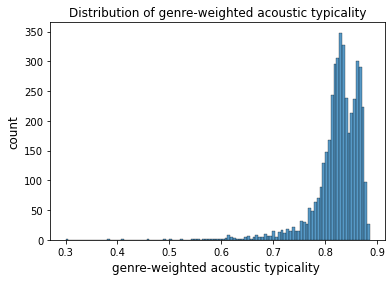

In [14]:
# avg acoustic typicality plot

sns.histplot(full_songs_df['avg_acoustic_typ'])
plt.title('Distribution of genre-weighted acoustic typicality', fontsize=12)
plt.xlabel('genre-weighted acoustic typicality ', fontsize=12)
plt.ylabel('count', fontsize=12)

In [15]:
# write to csv
full_songs_df.to_csv('Data/spotify_global_songs_final_3.csv', index=False)